In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
 

In [2]:

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

TEST_SIZE = 0.2
NOISE = 0.2
EPOCHS = 1000  # number of epochs
ALPHA = 0.1  # learning rate
N_SAMPLES = 1000

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [3]:
X, y = datasets.make_moons(n_samples=N_SAMPLES, 
                           shuffle=True, 
                           noise=NOISE, 
                           random_state=RANDOM_STATE)
X[:5], y[:5]

(array([[ 0.90633951,  0.90267624],
        [-1.11536828,  0.75579289],
        [ 1.88769158,  0.4175967 ],
        [-0.93345034, -0.02299851],
        [-0.96872877,  0.06396285]]),
 array([0, 0, 1, 0, 0], dtype=int64))

In [4]:
#visualization
data_df = pd.DataFrame(X, columns = ['A', 'B'])

data_df['target'] = y

data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   target  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [6]:
data_df.describe() # Generate descriptive statistic

,A,B,target
count,1000.000000,1000.000000,1000.00000
mean,0.490841,0.239025,0.50000
std,0.898951,0.540082,0.50025
min,-1.688795,-0.955280,0.00000
25%,-0.149565,-0.205090,0.00000
50%,0.500100,0.241163,0.50000
75%,1.095048,0.680394,1.00000
max,2.419113,1.612075,1.00000


In [7]:
# what labels are present?
data_df.target.unique()

array([0, 1], dtype=int64)

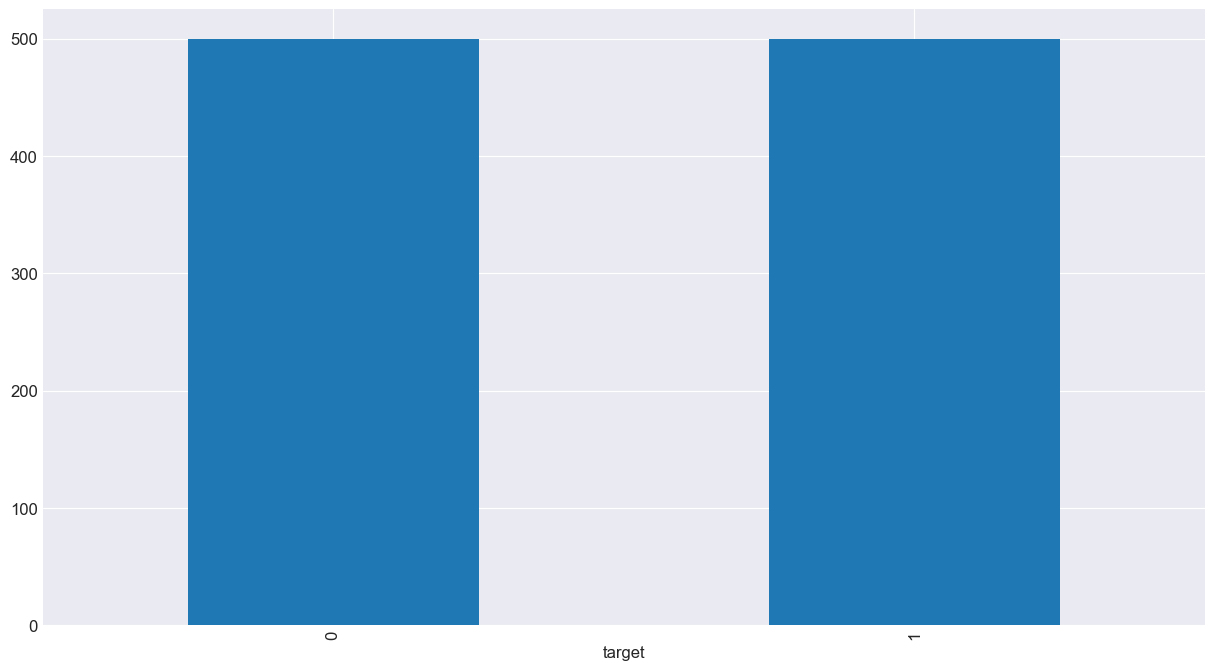

In [8]:
fig, ax = plt.subplots() # Instantiate
    
data_df['target'].value_counts().plot(ax=ax, kind='bar');

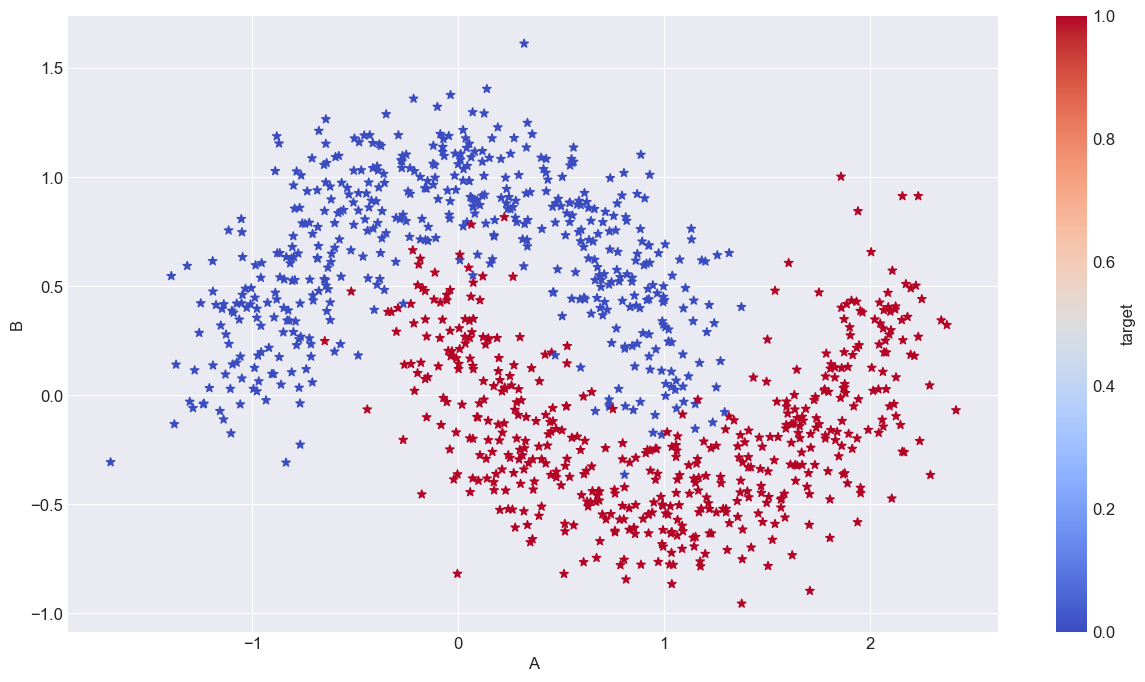

In [9]:
# Plot the data
data_df.plot.scatter('A', 'B',      # columns to plot
                     s = 40,        # size of the marker
                     marker = '*',  # type of marker
                     c = 'target',  # color as per target column
                     cmap=CMAP);    # using colormap

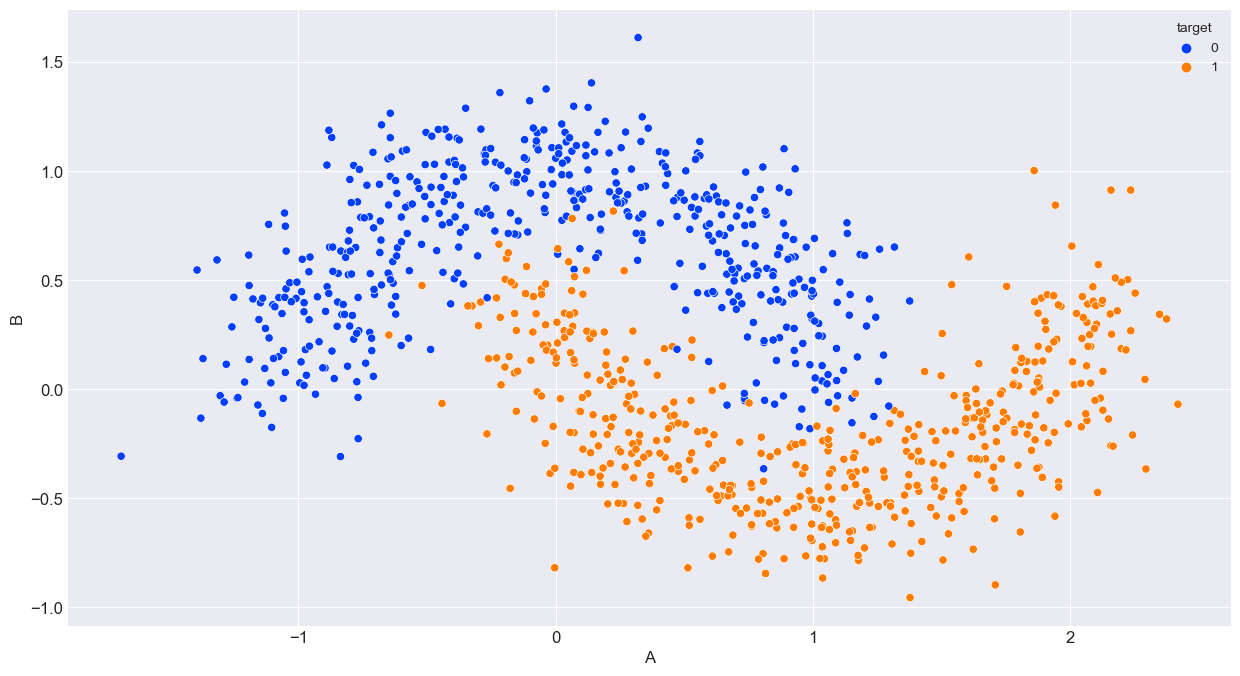

In [10]:
# Using Seaborn
ax = sns.scatterplot(data=data_df, # data from dataframe
                     x='A', y='B',  # X axis and y axis columns
                     palette=sns.color_palette("bright", 2), # color map
                     hue='target'); # Color as per target column

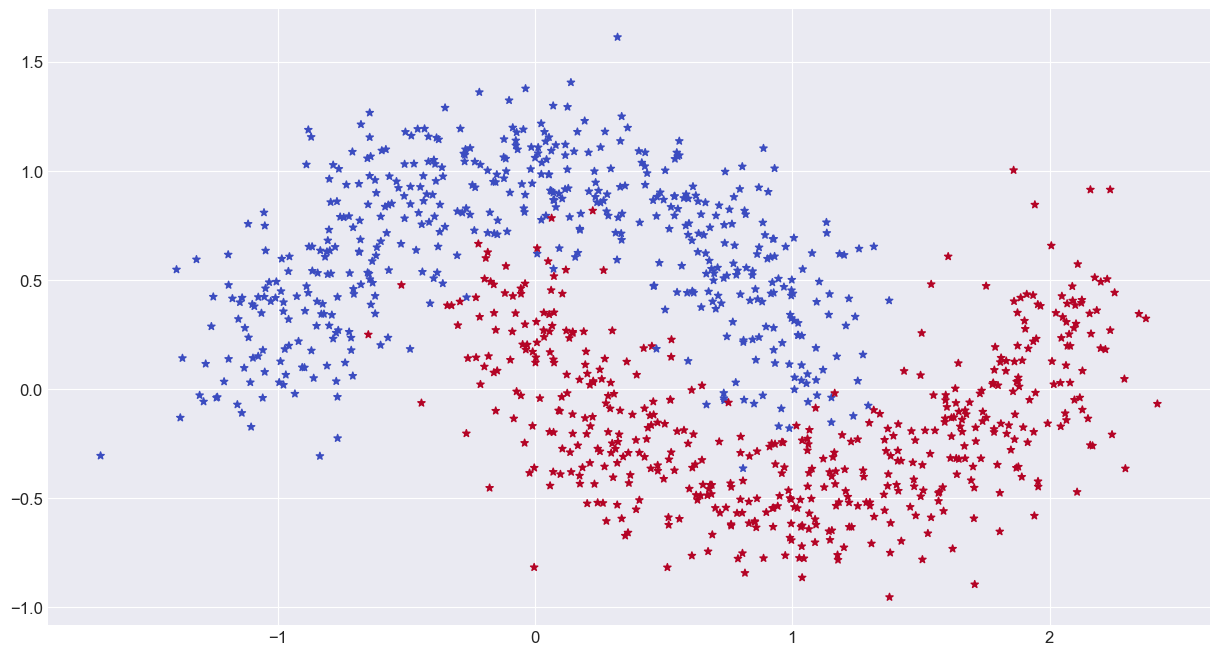

In [11]:
#### In case you want to plot X Array directly
plt.scatter(X[:,0], X[:,1], s=30, c=y, marker = '*', cmap=CMAP);

In [12]:
#plt.scatter?

In [13]:
data_train, data_test = data_df.to_numpy()[:900], data_df.to_numpy()[900:]

In [14]:
data_train.shape, data_test.shape

((900, 3), (100, 3))

In [15]:
type(data_train)

numpy.ndarray

In [16]:
X_train, X_test, y_train, y_test  =  train_test_split(X, y, stratify= y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

shape of input is frozen i.e. same as number of features.
shape of output is also frozen i.e. same as number of outputs. 
In hidden layer you can add as many no of neurons you want.
bias seats on the top of each neuron.


In [18]:
def fn_activ(z):
    return np.tanh(z)

def fn_activ_prime(a):
    return 1 - np.tanh(a)**2

In [19]:
def fn_sigmoid(z):
    return 1 / ( 1 + np.exp(-z))

In [20]:
sm = fn_sigmoid(np.asarray([[-1, 0,1], [-np.inf, 0, np.inf]]))

In [21]:
def predict(model, X_p):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    # forward propagation 
    # Layer 1
    z1 = X_p.dot(W1) + b1   #aggregation for layer 1
    a1 = fn_activ(z1)     #activation for layer 1

    # Layer 2
    z2 = a1.dot(W2) + b2   #aggregation for layer 2
    a2 = fn_sigmoid(z2)    #activation for layer 2

    return a2 >= 0.5   # it is greater or equal to 0.5

In [22]:
def calculate_loss(model, X_l, y_l):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']

    m = X_l.shape[0]
    
    # forward propagation 
    # Layer 1
    z1 = X_l.dot(W1) + b1   #aggregation for layer 1
    a1 = fn_activ(z1)     #activation for layer 1

    # Layer 2
    z2 = a1.dot(W2) + b2   #aggregation for layer 2
    a2 = fn_sigmoid(z2)    #activation for layer 2

    #binary
    data_loss = -(y_l*np.log(a2)).sum()   #calculating losses along each sample
 
    return data_loss / m 

In [34]:
def build_model(X_tr, y_tr, nn_hdim, nn_out, alpha=ALPHA, epochs=EPOCHS):
    '''
    Args:
        X_tr : Training features
        y_tr : Training labels
        nn_hdim : number of nodes in the hidden layer
        nn_out : size of output
    '''
    m, nn_input_dim = X_tr.shape
    nn_output_dim = nn_out

    W1= rng.random((nn_input_dim, nn_hdim), dtype = np.float32) / np.sqrt(nn_input_dim)

    W2= rng.random((nn_hdim, nn_output_dim), dtype = np.float32) / np.sqrt(nn_hdim)

    b1 = np.zeros((1, nn_hdim), dtype = np.float32)

    b2 = np.zeros((1, nn_output_dim), dtype = np.float32)

    curr_loss = 0

    loss, epoch = [] , []

    for i  in range (0, epochs):
        # forward propagation 
        # Layer 1
        z1 = X_tr.dot(W1) + b1
        a1 = fn_activ(z1) 

        # Layer 2
        z2 = a1.dot(W2) + b2
        a2 = fn_sigmoid(z2) 

        #back propogation
        #assert(a2.shape== y_tr.shape), f'check y {a2.shape}/{y_tr.shape}'
        dz2 = a2 - y_tr #remember dim of a2 and y to be same

        dW2 = (a1.T).dot(dz2)
        assert (W2.shape == dW2.shape), f'check W2 {W2.shape}/{dW2.shape}'

        db2 = np.sum(dz2, axis = 0, keepdims=True)
        assert (b2.shape == db2.shape), f'check b2 {b2.shape}/{db2.shape}'

        da1 = dz2.dot(W2.T)
        assert (a1.shape == da1.shape), f'check b2 {a1.shape}/{da1.shape}'

        # Layer 1
        dz1 = da1 * fn_activ_prime(z1)
        assert (z1.shape == dz1.shape), f'check b2 {z1.shape}/{dz1.shape}'

        dW1 = (X_tr.T).dot(dz1)
        assert (W1.shape == dW1.shape), f'check W2 {W1.shape}/{dW1.shape}'

        db1 = np.sum(dz1, axis=0, keepdims=True)
        assert (b1.shape == db1.shape), f'check b1 {b1.shape}/{db1.shape}'

        #Gradient Update
        W1 += - alpha * dW1 / m 
        b1 += - alpha * db1 / m 
        W2 += - alpha * dW2 / m 
        b2 += - alpha * db2 / m 

        model = { 'W1' : W1, 'b1' : b1,
                  'W2' : W2, 'b2' : b2 }

        curr_loss = calculate_losss(model, X_tr, y_tr)
        loss.append(curr_loss)
        epoch.append(i)

        if i % 100 == 0:
            print(f'After epoch: {i:3d}; loss: {curr_loss: .5f}')
        
    loss_hist['epoch'] = epoch
    loss_hist['loss'] = loss
    return model

In [31]:
print( y_train.shape)
y_train = y_train.reshape(-1,1)
print( y_train.shape)

(800, 1)
(800, 1)


In [32]:
nn_out_dim = 1
model = build_model(X_train, y_train, 4, nn_out_dim)

In [33]:
y_pred = predict(model, X_train)
accuracy_score(y_train, y_pred)

0.8725

In [ ]:
wgts = np.array([0.1, 2.0, 1, 0])
#predict(data_train[0], wgts)

In [ ]:
weights

In [ ]:
ax = plt.plot(errors) #loss curve
plt.title('Loss curve')

In [ ]:
rng.random(data_train.shape[1]) #w0, w1, w2
#Z = x*w + b
#Z = weights[0]

In [ ]:
X = data_train
fig, ax = plt.subplots() #instantiation of plt object
dm = 0.05  #spacing of the grid 
x_min, x_max = X[:,0].min() - 0.05 ,  X[:,0].max() + 0.05
y_min, y_max = X[:,1].min() - 0.05 ,  X[:,1].max() + 0.05

xx, yy = np.meshgrid(np.arange(x_min, x_max, dm), 
                     np.arange(y_min, y_max, dm))  #generating a mesh

XX = np.c_[xx.ravel(), yy.ravel()]  #prepare feature data

XX = np.hstack((XX, np.ones((XX.shape[0], 1))))

y_pred = []

for row in XX:
    pred = predict(row, weights)
    y_pred.append(np.round(pred))

Z = np.array(y_pred).reshape(xx.shape)

ax.contourf(xx, yy, Z, cmap=CMAP, alpha=0.8)
ax.scatter(X[:,0], X[:,1], c=X[:,2], edgecolors='k', cmap=plt.cm.bwr)

In [ ]:
xx.shape

In [ ]:
yy.shape

Train data

In [ ]:
#accuracy on train 
predictions = []
for row in data_train:
    pred  = predict(row, weights)
    predictions.append(np.round(pred))
accuracy_score(data_train[:,-1], predictions)


In [ ]:
#accuracy on test
predictions = []
for row in data_test:
    pred  = predict(row, weights)
    predictions.append(np.round(pred))
accuracy_score(data_test[:,-1], predictions)


In [ ]:
#confusion matrix on test
cm = confusion_matrix(data_test[:,-1], predictions)
cm

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm , display_labels=[0,1])
fig, ax = plt.subplots(figure=(6,6))
disp.plot(ax = ax, cmap='Blues', colorbar=False);
ax.grid(False);